This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set so make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last. This can help you increase your scores

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

The data has been loaded into a dataframe for you.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [2]:
# Load data
data = np.loadtxt('data-2.txt')
target = np.loadtxt('MEDV.txt')

# Creating dataframe for dataset with both inputs and target
bdata = pd.DataFrame(data)

#labeling columns
bdata.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
bdata['MEDV'] = target

bdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2


---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between median housing price and number of rooms per house. Do the following:

(a) Regress the housing price on the number of rooms per house. Draw a scatter plot of housing price (y-axis) against rooms (x-axis), and draw the regression line in blue.  You might want to make the dots semi-transparent if it improves the presentation of the figure. 

(b) Regress the housing price on the number of rooms per house and the (number of rooms per house) squared.  Show the (curved) regression line in green. 

(c) Interpret your results.

First model results:
const   -35.576207
RM        8.959927
dtype: float64
const   -12.944208
RM       21.267281
dtype: float64
Model R-squared: 0.47296720426573646
---------------------
Second model results:
const    71.736328
RM      -23.789603
RM2       2.469145
dtype: float64
const    5.575897
RM      -6.151721
RM2      8.513017
dtype: float64
Model R-squared: 0.5393385900930773
---------------------


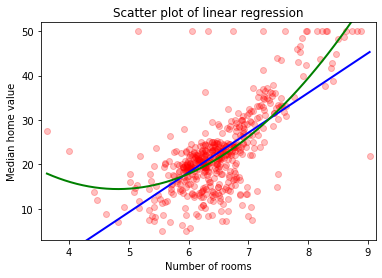

In [3]:
# Your code here

# Creating design and outcome matrices
X = bdata['RM'].copy()
y = bdata['MEDV'].copy()
X = sm.add_constant(X)

# Fitting first linear regression model 
model = sm.OLS(y,X)
results = model.fit()
print("First model results:")
print(results.params)
print(results.tvalues)
print("Model R-squared: {}".format(results.rsquared))
print("---------------------")

# Creating plot
plt.scatter(X['RM'], y, c='r', alpha=0.25)
plt.xlabel("Number of rooms")
plt.ylabel("Median home value")
plt.title("Scatter plot of linear regression")

# Plotting first regression line
x = np.arange(X['RM'].min(), X['RM'].max(), step=0.1)
y_value = results.params.const + results.params.RM*x
plt.plot(x, y_value, 'b', linestyle='-', linewidth=2)
plt.ylim(bottom=y.min()-2, top=y.max()+2)
plt.xlim(left=X['RM'].min()-0.1, right=X['RM'].max()+.1)

# Fitting the second linear regression model
X = bdata['RM'].copy().to_frame()
X['RM2'] = X['RM']**2
X = sm.add_constant(X)
y = bdata['MEDV'].copy()
model = sm.OLS(y,X)
results = model.fit()
print("Second model results:")
print(results.params)
print(results.tvalues)
print("Model R-squared: {}".format(results.rsquared))
print("---------------------")

# Plotting second regression line
x = np.arange(X['RM'].min(), X['RM'].max(), step=0.1)
y_value = results.params.const + results.params.RM*x + results.params.RM2*x**2
plt.plot(x, y_value, 'g', linestyle='-', linewidth=2)
plt.show()

*The first linear model using just the number of rooms to predict median home value runs fairly well through much of our data, and the model has an R-squared of ~0.473. However, there are definitely data points that it isn't able to take into account that the second model does due to adding the rooms squared term. This causes our R-squared score to increase to ~0.539. Since R-squared is a measure of how much variation in Y is explained by our model, an increase is generally a good thing (it can mean you are overfitting the data, although I doubt that's an issue here).*

*The t-values for all coefficients in both models are very large (the smallest is the coefficient on the intercept in model 2, and that's still 5.575), which means that it is unlikely we are observing a difference by pure chance. This gives us confidence in the strength of both models (although we would want to investigate further, as we did in problem set 1).*

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 5-fold cross-validation to fit the regression model (a) from 1.1, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Create a new scatterplot of housing price against rooms, and draw the five different regression lines in light blue, and the original regression line from 1.1 in red (which was estimated using the full dataset). What do you notice?

Fold0:
1 model results:
const   -35.121653
RM        8.881495
dtype: float64
const   -11.103364
RM       18.358232
dtype: float64
Model R-squared: 0.45603981469703225
---------------------
Fold1:
2 model results:
const   -31.621343
RM        8.281384
dtype: float64
const    -9.896755
RM       16.900009
dtype: float64
Model R-squared: 0.4147633445688542
---------------------
Fold2:
3 model results:
const   -25.723134
RM        7.292676
dtype: float64
const    -7.472228
RM       13.566048
dtype: float64
Model R-squared: 0.3135023064942998
---------------------
Fold3:
4 model results:
const   -46.014572
RM       10.562164
dtype: float64
const   -17.207709
RM       26.004773
dtype: float64
Model R-squared: 0.6265919207655093
---------------------
Fold4:
5 model results:
const   -36.544554
RM        9.294240
dtype: float64
const   -13.224449
RM       22.098928
dtype: float64
Model R-squared: 0.5478832256464541
---------------------


(3.528760242212798, 9.13073518404732)

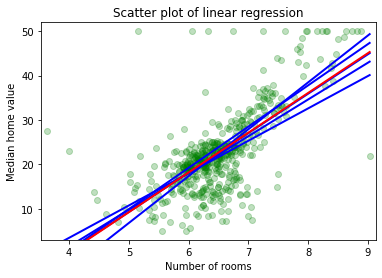

In [4]:
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold

# your code here
X = bdata['RM'].copy()
y = bdata['MEDV'].copy()
X = sm.add_constant(X)
kf = KFold(n_splits=5)
kf.get_n_splits(X)
results_array = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold{i}:")
    model = sm.OLS(y.loc[train_index],X.loc[train_index])
    results = model.fit()
    print("{} model results:".format(i+1))
    print(results.params)
    results_array.append(results.params)
    print(results.tvalues)
    print("Model R-squared: {}".format(results.rsquared))
    print("---------------------")
    

# Fitting the non-cross-validated model
model = sm.OLS(y,X)
results = model.fit()

# Creating plot
plt.scatter(X['RM'], y, c='g', alpha=0.25)
plt.xlabel("Number of rooms")
plt.ylabel("Median home value")
plt.title("Scatter plot of linear regression")

# Plotting the cross-validated regression lines
for i in range(len(results_array)):
    curr_results = results_array[i]
    y_value = curr_results.const + curr_results.RM*x
    plt.plot(x, y_value, 'b', linestyle='-', linewidth=2);
    
# Plotting first regression line after the cross-validated lines so it is visible
x = np.arange(X['RM'].min(), X['RM'].max(), step=0.1)
y_value = results.params.const + results.params.RM*x
plt.plot(x, y_value, 'r', linestyle='-', linewidth=2)
plt.ylim(bottom=y.min()-2, top=y.max()+2)
plt.xlim(left=X['RM'].min()-0.1, right=X['RM'].max()+.1)

*Looking at the model results from cross-validation, it's interesting that some of the models were much better than others, due to the random splits of the data they had. The highest R-squared score was ~0.6266, which is higher than the R-squared from the second model where we included rooms squared. Because of these differences, the five lines have different slopes and coefficients than our model using all of the data (although one cross-validated model is rather close to the original model). Furthermore, the slopes seem to be rather equally distributed around our initial model slope. To me, this adds strength to our inital results by accounting for potential random variation in data and can help when our model encounters new data.*

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *
* *Hint 3: To test the parameters estimated by your implementation of GD, compare the results with that of `sklearn.linear_model.LinearRegression()`*

In [5]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""

def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000, epsilon=0.00001):
    # initialize the parameters - I'm initializing randomly rather than starting at an arbitrary point
    alpha = np.random.randn()
    beta = np.random.randn()
    parameters = np.array([alpha, beta]).reshape(-1,1)
    # Defining lists to keep track of termination criteria
    start_time = time.time()
    X = xvalues.copy().to_frame()
    y = yvalues.copy()
    y_new = np.reshape(np.array(y), (len(y), 1))
    X.insert(0, 'Intercept', 1)
    
    cost_array = []
    for i in range(MaxIterations):
        gradients = 2 * np.dot(X.T, np.dot(X, parameters) - y_new) / X.shape[0]
        parameters = parameters - R*gradients
        curr_loss = np.sum(np.dot(X, parameters) - y_new)
        # Implementing stopping condition - cost going below our epsilon value
        if i>0 and np.abs(cost_array[-1] - curr_loss) < epsilon:
            print('Cost converges after {} times'.format(i))
            break
        cost_array.append(curr_loss)
    alpha = parameters[0][0]
    beta = [parameters[i+1][0] for i in range(len(parameters)-1)]
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta

# example function call
X = bdata['RM'].copy()
y = bdata['MEDV'].copy()
results = []
learning_rate_grid = [0.01, 0.02, 0.001, 0.0001, 0.00001]
for learning_rate in learning_rate_grid:  
    results.append(bivariate_ols(X, y, learning_rate, 100000))
    
for result, learning_rate in zip(results, learning_rate_grid):
    # Note: We only care about result[1][0] for now because we know it's bivariate regression
    print("Learning Rate: {}, Intercept: {}, Coefficient: {}".format(learning_rate, result[0], result[1][0]))
    
    
# # Results from sklearn
reg = sklearn.linear_model.LinearRegression().fit(np.asarray(X).reshape(-1,1), np.asarray(y).reshape(-1,1))
print(reg.intercept_, reg.coef_)

Cost converges after 37034 times
Time taken: 19.17 seconds
Cost converges after 20049 times
Time taken: 10.50 seconds
Time taken: 52.74 seconds
Cost converges after 1373 times
Time taken: 0.70 seconds
Cost converges after 13715 times
Time taken: 7.08 seconds
Learning Rate: 0.01, Intercept: -35.56863421334029, Coefficient: 8.95877290656635
Learning Rate: 0.02, Intercept: -35.57242148069403, Coefficient: 8.959350202195248
Learning Rate: 0.001, Intercept: -31.854664151018863, Coefficient: 8.39265003152886
Learning Rate: 0.0001, Intercept: 1.408391608988382, Coefficient: 3.322323555424765
Learning Rate: 1e-05, Intercept: 1.132912121329947, Coefficient: 3.3643118785889556
[-35.57620687] [[8.95992721]]


*The alpha and beta that minimize my loss function are alpha: -35.5724 and beta: 8.95935 (for a learning rate of 0.02).*

*It takes my algorithm 20104 iterations to converge for R=0.02, 37253 iterations to converge for R=0.01, the algorithm doesn't converge for R=0.001, it converges after 1444 iterations for R=0.0001, and 13817 iterations for R=0.00001. For the latter two, it seems like the algorithm is converging "quickly" because the learning rate is less than my default epsilon termination criteria. I tried using the smallest learning rate for the termination criteria, but that made the algorithm take far longer to run and didn't improve performance.*

*The algorithm takes ~20.99 seconds to run for R=0.01, ~11.56 seconds for R=0.02, and 54.24 seconds for R=0.001. For the other learning rates, they're encountering the termination criteria quickly, so it takes between 0-7 seconds to terminate.*

*The coefficient for R=0.02 is closest to the one from sklearn. Sklearn's coefficients are alpha: -35.576 and beta: 8.9599. My coefficents for R=0.01 are alpha: -35.5686, and beta: 8.9587. The coefficients for R=0.001 are alpha: -31.895 and beta: 8.8988. This indicates that our learning rate may be too small starting with R=0.001, because after 100000 iterations, it still hasn't converged.*

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [6]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using TAX and RM as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

* *Hint 2: To test the parameters estimated by your implementation of GD, compare the results with that of `sklearn.linear_model.LinearRegression()`*

In [7]:
np.random.seed(1443)
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=10000, epsilon=1e-10, add_intercept=True):
    # your code here
    start_time = time.time()
    X = xvalue_matrix
    y = yvalues
    y_new = np.reshape(np.array(y), (len(y), 1))
    alpha = np.random.randn()
    alpha_array = []
    beta = np.random.randn(X.shape[1])
    beta_array = []
    parameters = np.array([alpha, *beta]).reshape(-1,1)
    parameters_array = [parameters]
    if add_intercept:  
        X.insert(0, 'Intercept', 1)
    cost_array = []
    for i in range(MaxIterations):
        # np.dot(X, parameters) - y_new == sum(alpha + b1x1 + b2x2 - y)
        # np.dot(X.T, the dot product above) == multiplying the summation by all independent variable vectors
        gradients = 2 * np.dot(X.T, np.dot(X, parameters) - y_new) / X.shape[0]
        parameters = parameters - R*gradients
        parameters_array.append(parameters)
        curr_loss = np.sum((np.dot(X, parameters) - y_new)**2) / X.shape[0]
        # Stopping condition
        if i>0 and np.abs(curr_loss - cost_array[-1]) < 1e-10:
            print(curr_loss)
            print(cost_array[-1])
            print(cost_array[-1] - curr_loss)
            print('Cost converges after iteration times: {}'.format(i))
            break
        cost_array.append(curr_loss)
    alpha = parameters[0][0]
    beta_array = [parameters[i+1][0] for i in range(len(parameters)-1)]
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

X = standardize(bdata[['TAX','RM']].copy())
y = standardize(bdata['MEDV'].copy())
results = []
learning_rate_grid = [0.01, 0.02, 0.001, 0.0001]
for learning_rate in learning_rate_grid:  
    X = standardize(bdata[['TAX','RM']].copy())
    y = bdata['MEDV'].copy()
    results.append(multivariate_ols(X, y, learning_rate, 100000))
    print("-------------------------------------------------")
    
for result, learning_rate in zip(results, learning_rate_grid):
    print("Learning Rate: {}, Intercept: {}, Coefficient: {}".format(learning_rate, result[0], result[1]))
    print("-------------------------------------------------")

X = standardize(bdata[['TAX','RM']].copy())
y = bdata['MEDV'].copy()
reg = sklearn.linear_model.LinearRegression().fit(X,y)
print("Sklearn Linear Regression Results:")
print(reg.intercept_, reg.coef_)

37.69463212750221
37.69463212760162
9.941203416019562e-11
Cost converges after iteration times: 715
Time taken: 0.37 seconds
-------------------------------------------------
37.69463212576174
37.694632125859044
9.730172223498812e-11
Cost converges after iteration times: 368
Time taken: 0.20 seconds
-------------------------------------------------
37.69463215892661
37.69463215902654
9.993073035730049e-11
Cost converges after iteration times: 6924
Time taken: 3.59 seconds
-------------------------------------------------
37.694632466743194
37.694632466843174
9.99804683488037e-11
Cost converges after iteration times: 60047
Time taken: 31.31 seconds
-------------------------------------------------
Learning Rate: 0.01, Intercept: 22.53279480137108, Coefficient: [-2.7214055741881493, 5.538693490978714]
-------------------------------------------------
Learning Rate: 0.02, Intercept: 22.532799725732243, Coefficient: [-2.721391250878809, 5.538707853060296]
----------------------------------

*The coefficients that minimize the cost function are similar for R=0.01, 0.02, 0.001, and 0.0001. The alpha values are very close to 22.5326. The beta values are all generally around -2.721 and 5.5382, with some differences in decimals after that.*

*Convergence occured at 715 iterations for R=0.01, 368 for R=0.02, 6924 for R=0.001, and 60047 iterations for R=0.0001. At shortest, the algorithm took 0.2 seconds to run for R=0.02. At longest, it took 30.96 seconds for R=0.0001.*

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [8]:
# Your code here
results = []
learning_rate_grid = [0.1, 0.01, 0.001]
for learning_rate in learning_rate_grid:  
    X = bdata[['TAX','RM']].copy()
    y = bdata['MEDV'].copy()
    results.append(multivariate_ols(X, y, learning_rate, 10000))
    
for result, learning_rate in zip(results, learning_rate_grid):
    print("Learning Rate: {}, Intercept: {}, Coefficient: {}".format(learning_rate, result[0], result[1]))

/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:51: RuntimeWarning: overflow encountered in square
  curr_loss = np.sum((np.dot(X, parameters) - y_new)**2) / X.shape[0]
/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:57: RuntimeWarning: invalid value encountered in double_scalars
  if i>0 and np.abs(curr_loss - cost_array[-1]) < 1e-10:
/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:49: RuntimeWarning: invalid value encountered in subtract
  parameters = parameters - R*gradients


Time taken: 5.35 seconds


/Users/jaredschober/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:51: RuntimeWarning: overflow encountered in square
  curr_loss = np.sum((np.dot(X, parameters) - y_new)**2) / X.shape[0]
/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:57: RuntimeWarning: invalid value encountered in double_scalars
  if i>0 and np.abs(curr_loss - cost_array[-1]) < 1e-10:
/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:49: RuntimeWarning: invalid value encountered in subtract
  parameters = parameters - R*gradients


Time taken: 5.13 seconds


/Users/jaredschober/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:51: RuntimeWarning: overflow encountered in square
  curr_loss = np.sum((np.dot(X, parameters) - y_new)**2) / X.shape[0]
/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:57: RuntimeWarning: invalid value encountered in double_scalars
  if i>0 and np.abs(curr_loss - cost_array[-1]) < 1e-10:
/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:48: RuntimeWarning: overflow encountered in multiply
  gradients = 2 * np.dot(X.T, np.dot(X, parameters) - y_new) / X.shape[0]
/var/folders/5w/82q2gcks59d3npvwjk0xmsm80000gn/T/ipykernel_1492/2776048841.py:49: RuntimeWarning: invalid value encountered in subtract
  parameters = parameters - R*gradients


Time taken: 5.16 seconds
Learning Rate: 0.1, Intercept: nan, Coefficient: [nan, nan]
Learning Rate: 0.01, Intercept: nan, Coefficient: [nan, nan]
Learning Rate: 0.001, Intercept: nan, Coefficient: [nan, nan]


*Using non-standardized data for multivariate gradient descent causes the algorithm to diverge. I end up with nan (or infinity) coefficients, and it never hits the stopping condition (because that's looking at when the change gets too small). This is likely because without standardizing the data, each parameter has a different scale, so each step affects the variables differently.*

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that. Use 5-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for TAX and RM). Since there are 5 folds, there will be 5 sets of three coefficients -- report them all in a 5x3 table.

In [9]:
# Your code here
X = standardize(bdata[['TAX','RM']].copy())
y = bdata['MEDV'].copy()
kf = KFold(n_splits=5, shuffle=True, random_state=123)
kf.get_n_splits(X)

results_array = []
learning_rate = 0.01
iterations = 100000

for i, (train_index, test_index) in enumerate(kf.split(X)):
    alpha, beta_array = multivariate_ols(standardize(X.loc[train_index]), y.loc[train_index], learning_rate, iterations, True)
    results_array.append([alpha, *beta_array])

pd.DataFrame(results_array, columns=['alpha', 'beta_1', 'beta_2'])

35.202753610819634
35.20275361091764
9.800515954339062e-11
Cost converges after iteration times: 753
Time taken: 0.41 seconds
37.490613985895344
37.490613985994614
9.92699256130436e-11
Cost converges after iteration times: 763
Time taken: 0.39 seconds
36.496829657950194
36.49682965804789
9.769962616701378e-11
Cost converges after iteration times: 646
Time taken: 0.34 seconds
42.20058718614216
42.20058718624115
9.899281394609716e-11
Cost converges after iteration times: 702
Time taken: 0.37 seconds
36.9225184850513
36.92251848514862
9.732303851706092e-11
Cost converges after iteration times: 695
Time taken: 0.36 seconds


,alpha,beta_1,beta_2
0,22.374747,-2.782849,5.650499
1,22.512835,-2.546329,5.579912
2,22.775509,-2.680918,5.606405
3,22.605418,-2.765282,5.378979
4,22.395046,-2.822537,5.477452


*The coefficients I found from cross-validation seem to be centered around the terms I calculated in 2.3, but with variance across each fold. I calculated beta1 to be approximately -2.6, and the range found via cross validation is from -2.822 to -2.546. Similarly, for beta2, I calcualted ~5.5, and the range is from 5.379 to 5.65. The values for alpha are all around 22.5, with a range from 22.374 to 22.775.*

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the cross-validated RMSE for each of the 5 folds above. In other words, in fold 1, use the parameters estimated on the 80% of the data to make predictions for the 20%, and calculate the RMSE for those 20%. Repeate this for the remaining folds. Report the RMSE for each of the 5-folds, and the average (mean) RMSE across the five folds. How does this average RMSE compare to the performance of your nearest neighbor algorithm from the last problem set?

In [10]:
# Your code here
np.random.seed(1443)
X = standardize(bdata[['TAX','RM']].copy())
X = sm.add_constant(X)
y = bdata['MEDV'].copy()
rmse_array = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_fold = X.loc[test_index]
    X_fold = X_fold
    y_fold = y.loc[test_index]
    y_pred = np.sum(X_fold * results_array[i], axis=1)
    squared_error = ((y_pred - y_fold) **2)
    rmse_array.append(np.sqrt(np.mean(squared_error)))

print(rmse_array)
print(np.mean(rmse_array))

[6.912717100751175, 6.215769682033972, 6.539408906703317, 4.44530891646564, 6.392062506289428]
6.101053422448706


*The RMSE for each of the five folds is: 6.9127, 6.2157, 6.5394, 4.4453, and 6.3920. The average RMSE across the five folds is 6.1010. This is a bit lower than the performance of my nearest neighbor algorithm from the last problem set. For that algorithm, I ended up with an average RMSE value of 6.39 for 25-fold cross validation. Interestingly, that's the average RMSE I calculated for 25-fold cross validation. Since we've only used 5 folds here, that may be indicative of a better performing model.*

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use this as the binary outcome variable in your logistic regression model with CHAS and RM as inputs. Report your results.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

# Creating expensive dummy variable
bdata['EXPENSIVE'] = (bdata['MEDV'] > 40.0).astype(int)

X = standardize(bdata[['CHAS','RM']].copy())
y = bdata['EXPENSIVE'].copy()
reg = LogisticRegression(fit_intercept=True, penalty='none').fit(X,y)
reg.intercept_, reg.coef_

(array([-4.49905915]), array([[0.32016193, 2.10547548]]))

In [40]:
# Your code here
def logistic_regression(xvalue_matrix, yvalues, R=0.01, MaxIterations=10000, add_intercept=True):
    '''
    Function
    --------
    multivariate_logistic regression
        Gradient Decent to minimize logistic regression. Used to find co-efficients of multivariate logistic regression

    Parameters
    ----------
    xvalue_matrix, yvalues : narray
        xvalue_matrix: independent variable
        yvalues: dependent variable

    R: float
        Learning rate

    MaxIterations: Int
        maximum number of iterations


    Returns
    -------
    alpha: float
        intercept

    beta_array: array[float]
        co-efficient
    cost_array: array[float]
        Cost at each iteration
    parameters_array[float]
        coefficients at each iteration
    '''
    start_time = time.time()
    X = xvalue_matrix
    y = yvalues
    y_new = np.reshape(np.array(y), (len(y), 1))
    alpha = np.random.randn()
    alpha_array = []
    beta = np.random.randn(X.shape[1])
    beta_array = []
    parameters = np.array([alpha, *beta]).reshape(-1,1)
    parameters_array = [parameters]
    if add_intercept:  
        X.insert(0, 'Intercept', 1)
    cost_array = []
    for i in range(MaxIterations):
        # np.dot(X, parameters) - y_new == sum(alpha + b1x1 + b2x2 - y)
        # np.dot(X.T, the dot product above) == multiplying the summation by all independent variable vectors
        y_hat = 1/(1+np.exp(-np.dot(X, parameters)))
        gradients = 2 * np.dot(X.T, (y_hat - y_new)) / X.shape[0]
        parameters = parameters - R*gradients
        parameters_array.append(parameters)
        curr_loss = -1 * np.sum(y_new*np.log(y_hat) + (1-y_new)*np.log(1-y_hat)) / X.shape[0]
        
        
        # Stopping condition
        if i>0 and np.abs(curr_loss - cost_array[-1]) < 1e-10:
            print(curr_loss)
            print(cost_array[-1])
            print(cost_array[-1] - curr_loss)
            print('Cost converges after iteration times: {}'.format(i))
            break
        cost_array.append(curr_loss)
    alpha = parameters[0][0]
    beta_array = [parameters[i+1][0] for i in range(len(parameters)-1)]
    
    return alpha, beta_array, cost_array, parameters_array

np.random.seed(1443)
X = standardize(bdata[['CHAS','RM']].copy())
y = bdata['EXPENSIVE'].copy()
alpha, beta_array, cost_array, parameters_array = logistic_regression(X, y, MaxIterations=100000)


0.11787551703148859
0.11787551713145923
9.997064287503576e-11
Cost converges after iteration times: 32545


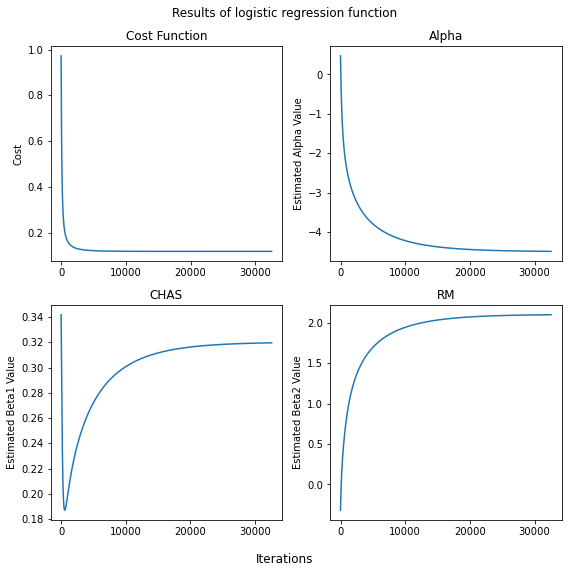

In [41]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
fig.suptitle("Results of logistic regression function")
ax[0][0].set_title("Cost Function")
ax[0][0].plot(cost_array)
ax[0][0].set_ylabel("Cost")

ax[0][1].set_title("Alpha")
alpha = [item[0] for item in parameters_array]
ax[0][1].plot(alpha)
ax[0][1].set_ylabel("Estimated Alpha Value")

ax[1][0].set_title("CHAS")
beta1 = [item[1] for item in parameters_array]
ax[1][0].plot(beta1)
ax[1][0].set_ylabel("Estimated Beta1 Value")

ax[1][1].set_title("RM")
beta2 = [item[2] for item in parameters_array]
ax[1][1].plot(beta2)
ax[1][1].set_ylabel("Estimated Beta2 Value")
fig.supxlabel("Iterations")
plt.tight_layout();

In [42]:
# Interpretation of results
parameters = parameters_array[-1]
print("Raw coefficients: {}".format(parameters.reshape(1,-1)[0]))
# Converting raw coefficients to odds ratios
odds_ratios = np.exp(parameters.reshape(1,-1)[0])
print("Odds Ratios: {}".format(odds_ratios))

Raw coefficients: [-4.4910756   0.3196043   2.10093202]
Odds Ratios: [0.01120858 1.37658295 8.17378446]


*The results of my logistic regression function are: alpha: -4.4910, beta1: 0.3196, beta2: 2.1009. This is pretty close to the sklearn logistic regression function results: alpha: -4.4990, beta1: 0.32016, beta2: 2.1054. (Sklearn by default includes ridge regularization in its logistic regression, so I had to turn that off to get the same results.)*

*Since we're trying to interpret logistic regression, we can't directly say a one unit increase in CHAS or RM directly means a 0.3 or 2.1 percent increase in a home being expensive. In particular, the interpretation of beta2 doesn't make any sense. Converting my coefficients to odds ratios helps us interpret the coefficients. Specifically, the coefficient on CHAS becomes 1.3765, which means that a home being in a tract that borders the Charles river is associated with a ~37% increase in odds of being an expensive home. Similarly, a one unit increase in the number of rooms is associated with more than an 8x increase in odds of being an expensive home.*

*To pressure test my results, I graphed the cost and parameter gradients as my algorithm processed (shown in the 2x2 graph). Across over 30k iterations, the cost and parameters all seem to be nicely following the gradient to their optimal values. Although the coefficients aren't exactly the same as from sklearn, they are pretty close. As for the graph of beta_CHAS, I'm not sure why it drops off very suddenly at the beginning and then rises. This didn't occur until I set my random seed to 1443 to ensure reproducibility.*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.

In [43]:
# Your code here
np.random.seed(1443)
# Dropping added column from logistic regression
if bdata.keys().isin(['EXPENSIVE']).max():
    bdata = bdata.drop(columns='EXPENSIVE')
df = bdata.copy()
for feature in bdata.loc[:, bdata.keys() !='MEDV'].keys():
    for interaction in bdata.loc[:, bdata.keys() !='MEDV'].keys():
        # Making sure I haven't added this new feature yet
        if not df.keys().isin([interaction + "*" + feature]).max():
            # If they're not the same, interact them
            if feature != interaction:
                new_feature = pd.DataFrame(df.loc[:, feature] * df.loc[:, interaction], columns=[feature + "*" + interaction])
                df = pd.concat([df,new_feature], axis=1)
            # If they are the same, square the term
            else:
                new_feature = pd.DataFrame((df.loc[:, feature] * df.loc[:, feature]))
                new_name = feature+"^2"
                new_feature = new_feature.rename(columns={feature: new_name})
                df = pd.concat([df,new_feature], axis=1)
print(df.shape)
train_set = df.sample(frac=0.8)
test_set = df.drop(train_set.index)

(506, 105)


*Since we start with 13 features, K+ (K*(K+1))/2 yields a total of 104 features. With our outcome variable, MEDV, includes, we have 105 columns in total.*

### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [44]:
np.random.seed(1443)

# Setting up design matrix and storing mean and std values for later
features = train_set.keys() !='MEDV'
X = standardize(train_set.loc[:, features].copy())
sample_mean_x = train_set.loc[:, features].copy().mean()
sample_std_x = train_set.loc[:, features].copy().std()
y = train_set['MEDV'].copy()

# Running gradient descent for training data
results = multivariate_ols(X, y, 0.01, 100000)
y_pred = np.sum(X * [results[0], *results[1]], axis=1)
squared_error = (y - y_pred) **2
train_rmse = np.sqrt(np.mean(squared_error))
train_rmse

# Running gradient descent for training data, making sure to normalize with our sample mean and std
X_test = sm.add_constant(test_set.loc[:, features].copy())
X_test = (X_test - sample_mean_x) / sample_std_x
y_test = test_set['MEDV'].copy()
y_pred = np.sum(X_test * [results[0], *results[1]], axis=1)
squared_error = (y_test - y_pred) **2
test_rmse = np.sqrt(np.mean(squared_error))
test_rmse

# Reporting results
train_rmse, test_rmse

Time taken: 74.25 seconds


(2.7215808752074677, 47.1769406942674)

*When I include all features from 4.1 in my model, it takes about 60-80 seconds to run, the training RMSE plummets to about ~2.7215, and the test RMSE increases to ~47.1769. The training RMSE is lower than 3.2 or nearest neighbor (by far), but the test RMSE is also much higher. This is a clear indication that we are overfitting the data.*

### 4.3 Ridge regularization (basic)
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data, using the value lambda = 0.5.  Report the RMSE obtained for your training data, and the RMSE obtained for your testing data.

In [142]:
# Your code here

def multivariate_ols_ridge(xvalue_matrix, yvalues, R=0.01, MaxIterations=10000, add_intercept=True, reg=0.5):
    # your code here
    start_time = time.time()
    X = xvalue_matrix
    y = yvalues
    y_new = np.reshape(np.array(y), (len(y), 1))
    alpha = np.random.randn()
    alpha_array = []
    beta = np.random.randn(X.shape[1])
    beta_array = []
    parameters = np.array([alpha, *beta]).reshape(-1,1)
    parameters_array = [parameters]
    if add_intercept:  
        X.insert(0, 'Intercept', 1)
    cost_array = []
    for i in range(MaxIterations):
        # Calculating gradients
        # np.dot(X, parameters) - y_new == sum(alpha + b1x1 + b2x2 - y)
        # np.dot(X.T, the dot product above) == multiplying the summation by all independent variable vectors
        gradients = np.dot(X.T, np.dot(X, parameters) - y_new) / X.shape[0]
        
        # Adding regularization to non-intercept gradients
        gradients[1:] = gradients[1:] + reg/X.shape[0]*parameters[1:]

        # Calculating regularization cost - excluding intercept parameter
        reg_cost = reg*np.sum(parameters[1:]**2)
        
        # Updating parameters
        parameters = parameters - R*gradients
        
        parameters_array.append(parameters)
        # Adding regularization cost to the cost function
        curr_loss = ((np.sum((np.dot(X, parameters) - y_new)**2)) + reg_cost) / (2* X.shape[0])
        if i>0 and np.abs(curr_loss - cost_array[-1]) < 1e-10:
            print(curr_loss)
            print(cost_array[-1])
            print(cost_array[-1] - curr_loss)
            print('Cost converges after iteration times: {}'.format(i))
            break
        
        cost_array.append(curr_loss)
    alpha = parameters[0][0]
    beta_array = [parameters[i+1][0] for i in range(len(parameters)-1)]
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

np.random.seed(1443)
features = train_set.keys() !='MEDV'
X = standardize(train_set.loc[:, features].copy())
sample_mean_x = train_set.loc[:, features].copy().mean()
sample_std_x = train_set.loc[:, features].copy().std()
y = train_set['MEDV'].copy()

results = multivariate_ols_ridge(X, y, 0.01, 100000, reg=30)
y_pred = np.sum(X * [results[0], *results[1]], axis=1)
squared_error = (y - y_pred) **2
train_rmse = np.sqrt(np.mean(squared_error))
train_rmse

X_test = sm.add_constant(test_set.loc[:, features].copy())
X_test = (X_test - sample_mean_x) / sample_std_x
y_test = test_set['MEDV'].copy()
y_pred = np.sum(X_test * [results[0], *results[1]], axis=1)
squared_error = (y_test - y_pred) **2
test_rmse = np.sqrt(np.mean(squared_error))
test_rmse

train_rmse, test_rmse

7.675295831989378
7.675295832089369
9.99911264898401e-11
Cost converges after iteration times: 11451
Time taken: 8.56 seconds


(3.604413227159521, 36.08915928091687)

In [143]:
from sklearn.linear_model import Ridge
clf = Ridge(fit_intercept=True, alpha=30)
features = train_set.keys() !='MEDV'
X = standardize(train_set.loc[:, features].copy())
y = train_set['MEDV'].copy()
clf.fit(X,y)
clf.intercept_, clf.coef_

(22.422222222222235,
 array([ 0.03696934, -0.05598336,  0.06433376,  0.08963693,  0.04021113,
         1.59270255, -0.01205807, -0.51177034,  0.51988319, -0.13405028,
        -0.43919471,  0.25454583, -0.35375111,  0.07804643,  0.20266612,
         0.05283464,  0.88276083, -0.18761718, -0.51702887,  0.12796636,
        -0.24523725,  0.01687757,  0.0414901 ,  0.02078411, -0.52747571,
         0.20355266,  0.42965122, -0.38976036, -0.00793822,  0.42091192,
         0.42996856,  0.17885632,  0.04281518, -0.00830639, -0.21409271,
         0.11625647, -0.00919906, -0.78373155,  0.74432657, -0.04950277,
        -0.15296487, -0.54921068,  0.08235111, -0.51226288,  0.20492935,
         0.60975622, -0.017801  ,  0.27909616, -0.48696624,  0.08963693,
        -0.28192706, -0.16773475,  0.3802671 ,  0.43424648, -0.79354708,
        -0.28389111,  0.13566255,  0.45805863, -0.44566631, -0.25195283,
         0.01748238, -0.2711279 , -0.10740011,  0.09804477, -0.24818083,
        -0.19810158,  0.511025

In [144]:
np.round((results[1] - clf.coef_), 2)

array([ 0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,
        0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
        0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0.,
       -0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,
       -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])

*This is showing that my coefficients and sklearn's coefficients are very similar.*

In [145]:
X = sm.add_constant(X)
sample_mean_x = train_set.loc[:, features].copy().mean()
sample_std_x = train_set.loc[:, features].copy().std()
y_pred = np.sum(X * [clf.intercept_, *clf.coef_], axis=1)
y_pred
squared_error = (y - y_pred) **2
train_rmse = np.sqrt(np.mean(squared_error))
train_rmse

X_test = sm.add_constant(test_set.loc[:, features].copy())
X_test = (X_test - sample_mean_x) / sample_std_x
y_test = test_set['MEDV'].copy()
y_pred = np.sum(X_test * [clf.intercept_, *clf.coef_], axis=1)
squared_error = (y_test - y_pred) **2
test_rmse = np.sqrt(np.mean(squared_error))
test_rmse

train_rmse, test_rmse

(3.6044008971537385, 36.088370330106756)

*Using L2 regularization with lambda=0.5, my training RMSE is 3.6044 and my test RMSE is 36.0891. The training RMSE has has increased a bit from 4.2 (it was 2.616), while the test RMSE has been reduced by a good amount (from 48.8678). This is likely because the L2 regularization is driving some coefficients to zero. This makes sense because we're fitting the model with so many parameters (many of which we would likely believe don't have much impact), while the number of true parameters is probably pretty small.*

### 4.4: Cross-validate lambda

This is where it all comes together! Use k-fold cross-validation to select the optimal value of lambda. In other words, define a set of different values of lambda. Then, using the 80% of your data that you set aside for training, iterate through the values of lambda one at a time. For each value of lambda, use k-fold cross-validation to compute the average cross-validated (test) RMSE for that lambda value, computed as the average across the held-out folds. You should also record the average cross-validated train RMSE, computed as the average across the folds used for training. Create a scatter plot that shows RMSE as a function of lambda. The scatter plot should have two lines: a red line showing the cross-validated (test) RMSE, and a blue line showing the cross-validated train RMSE.  At this point, you should not have touched your held-out 20% of "true" test data.

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

Go brag to your friends about how you just implemented cross-validated ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [302]:
# Your code here
np.random.seed(1443)
lambda_values = [0.1, 0.5, 1, 2,2.5, 3,3.5, 4,5, 10, 15, 20]
learning_rate = 0.01
iterations = 100000
features = train_set.keys() !='MEDV'
avg_train_rmse = []
avg_test_rmse = []

for j in range(len(lambda_values)):
    X = standardize(train_set.loc[:, features].copy())
    sample_mean = train_set.loc[:, features].copy().mean()
    sample_std = train_set.loc[:, features].copy().std()
    y = train_set['MEDV'].copy()
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    train_rmse_array = []
    test_rmse_array = []

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_fold = standardize(X.loc[X.index[train_index]])
        y_fold = y.loc[y.index[train_index]]
        results = multivariate_ols_ridge(X_fold, y_fold, learning_rate, iterations, True, reg=lambda_values[j])
        # Computing train_rmse
        y_pred = np.sum(X_fold * [results[0], *results[1]], axis=1)
        squared_error = (y_fold - y_pred) **2
        train_rmse = np.sqrt(np.mean(squared_error))
        print(train_rmse)
        train_rmse_array.append(train_rmse)

        # Computing test_rmse
        y_holdout = y.loc[y.index[test_index]]
        X_test = X.loc[X.index[test_index]]
        X_test = sm.add_constant(X_test, prepend=True, has_constant='add')
        y_holdout = y.loc[y.index[test_index]]
        y_pred = np.sum(X_test * [results[0], *results[1]], axis=1)
        squared_error = (y_holdout - y_pred) **2
        test_rmse = np.sqrt(np.mean(squared_error))
        print(test_rmse)
        test_rmse_array.append(test_rmse)
        
        

    avg_train_rmse.append(np.mean(train_rmse_array))
    avg_test_rmse.append(np.mean(test_rmse_array))
avg_train_rmse, avg_test_rmse

Time taken: 67.58 seconds
2.4245432365498294
4.671879993488715
Time taken: 69.28 seconds
2.7062846878537883
4.865795196440327
Time taken: 69.01 seconds
2.7127478893991914
5.101230061056592
Time taken: 67.21 seconds
2.8510065267173226
2.81409170552684
Time taken: 79.83 seconds
2.6984990795794483
3.464538738042718
Time taken: 71.56 seconds
2.5226857987725095
4.471911424399449
Time taken: 65.39 seconds
2.778766304813305
4.874404711626405
Time taken: 64.34 seconds
2.766894099043142
5.076205875728494
Time taken: 64.73 seconds
2.931384774168918
2.8175956810652574
Time taken: 64.01 seconds
2.7840447365176173
3.429243587005546
Time taken: 64.34 seconds
2.626438342531765
4.3863448181192455
Time taken: 64.10 seconds
2.8458950404215333
4.820965138643108
Time taken: 64.46 seconds
2.825319907865516
5.037649742674983
Time taken: 63.96 seconds
3.0136731758382846
2.842080688737007
Time taken: 64.70 seconds
2.8654146446259485
3.4124972884632174
4.54447492995832
4.544474930058312
9.99920146682598e-11
Co

([2.678616284019916,
  2.7567551426630983,
  2.8353482222566098,
  2.939989225764715,
  2.9782349394739405,
  3.011178304947651,
  3.0403231414719456,
  3.066622066984518,
  3.112964705574188,
  3.2785995092381293,
  3.390317524827771,
  3.4741713966946386],
 [4.183507138911039,
  4.133872255965031,
  4.099907535327512,
  4.075888648723352,
  4.072058201434264,
  4.070829979269497,
  4.071133252028767,
  4.072880240558877,
  4.078437025393707,
  4.121180070973233,
  4.162934144322807,
  4.197829516564599])

In [305]:
avg_train_rmse, avg_test_rmse

([2.678616284019916,
  2.7567551426630983,
  2.8353482222566098,
  2.939989225764715,
  2.9782349394739405,
  3.011178304947651,
  3.0403231414719456,
  3.066622066984518,
  3.112964705574188,
  3.2785995092381293,
  3.390317524827771,
  3.4741713966946386],
 [4.183507138911039,
  4.133872255965031,
  4.099907535327512,
  4.075888648723352,
  4.072058201434264,
  4.070829979269497,
  4.071133252028767,
  4.072880240558877,
  4.078437025393707,
  4.121180070973233,
  4.162934144322807,
  4.197829516564599])

The lambda value that minimizes test RMSE is 3


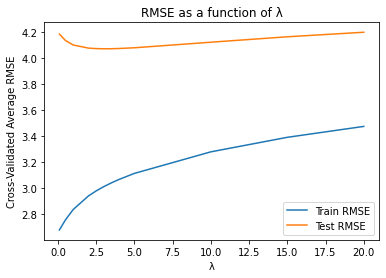

In [306]:
plt.plot(lambda_values, avg_train_rmse, label='Train RMSE')
plt.plot(lambda_values, avg_test_rmse, label='Test RMSE')
plt.xlabel("λ")
plt.ylabel("Cross-Validated Average RMSE")
plt.title("RMSE as a function of λ")
plt.legend();

optimal_lambda = lambda_values[np.argmin(avg_test_rmse)]
print("The lambda value that minimizes test RMSE is {}".format(optimal_lambda))

In [308]:
np.random.seed(1443)
features = train_set.keys() !='MEDV'
X = standardize(train_set.loc[:, features].copy())
y = train_set['MEDV'].copy()
sample_mean = train_set.loc[:, features].copy().mean()
sample_std = train_set.loc[:, features].copy().std()
learning_rate = 0.01
iterations = 100000
results = multivariate_ols_ridge(X, y, learning_rate, iterations, True, optimal_lambda)
X_test = (test_set.loc[:, features].copy() - sample_mean) / sample_std
X_test = sm.add_constant(X_test, prepend=True, has_constant='add')
y_pred = np.sum(X_test * [results[0], *results[1]], axis=1)
y_test = test_set['MEDV'].copy()
squared_error = (y_test - y_pred)**2
test_rmse = np.sqrt(np.mean(squared_error))
test_rmse

5.438087958876091
5.438087958976074
9.99831328840628e-11
Cost converges after iteration times: 81842
Time taken: 55.28 seconds


4.215658994376192

*I ran 5-fold cross validation for lambda values 0.1, 0.5, 1, 2,2.5, 3,3.5, 4,5, 10, 15, and 20. I find that the RMSE values decrease from 0.1 until 3, and then begin to rise. (The actual optimal lambda value is likely somewhere around 3 and not exactly 3, but the algorithm takes a while to run, so I wasn't able to fully optimize it.) The RMSE values for the training set range from 2.67 to 3.47, increasing gradually with lambda. This makes sense becuase we are punishing overfitting with regularization. Running ridge regression wiht a fixed lambda=3 yields a test rmse of 4.156. This is a bit higher than the test RMSE for lambda=3 from cross-validation, which makes sense because we are taking the average of 5 folds, vs. testing our model on the test set. This RMSE value is much lower than the test RMSE from 4.3 (36.089) and 4.2 (47.169), and a bit lower than the RMSE from 2.3 (5.538) and nearest neighbors (6.39).*